In [2]:
df


NameError: name 'df' is not defined

Removing the parts before | in the reviews column



In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,Unnamed: 0,reviews
0,0,We chose Rotterdam and London City airport b...
1,1,The entire booking and ticketing experience h...
2,2,British Airways cancelled my flight less th...
3,3,I wanted to write this review so I could give...
4,4,Check in fast and friendly. Security a breez...
...,...,...
995,995,London to Seattle. My seat was on the upper ...
996,996,London to Gibraltar. Check in at T3 was fine...
997,997,London to Boston. BA replaced A380 with a ve...
998,998,London to Doha. Similar to our outbound flig...


Step 1: Cleaning the text


In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews
0,0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...
1,1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...
2,2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...
3,3,I wanted to write this review so I could give...,I wanted to write this review so I could give...
4,4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...


Step 2: Tokenization
Step 3: Enrichment – POS tagging
Step 4: Stopwords removal
Step 5: Obtaining the stem words


In [ ]:

import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,reviews,Cleaned Reviews,POS tagged
0,0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...,"[(chose, v), (Rotterdam, n), (London, n), (Cit..."
1,1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e..."
2,2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...,"[(British, a), (Airways, n), (cancelled, v), (..."
3,3,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,..."
4,4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()


,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma
0,0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...,"[(chose, v), (Rotterdam, n), (London, n), (Cit...",choose Rotterdam London City airport conveni...
1,1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e...",entire booking ticket experience stressful e...
2,2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...,"[(British, a), (Airways, n), (cancelled, v), (...",British Airways cancel flight less hour Auto...
3,3,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,...",want write review could give huge thank one ...
4,4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...


In [ ]:
df[['reviews','Lemma']]


,reviews,Lemma
0,We chose Rotterdam and London City airport b...,choose Rotterdam London City airport conveni...
1,The entire booking and ticketing experience h...,entire booking ticket experience stressful e...
2,British Airways cancelled my flight less th...,British Airways cancel flight less hour Auto...
3,I wanted to write this review so I could give...,want write review could give huge thank one ...
4,Check in fast and friendly. Security a breez...,Check fast friendly Security breeze Lounge b...
...,...,...
995,London to Seattle. My seat was on the upper ...,London Seattle seat upper deck nice perk Sea...
996,London to Gibraltar. Check in at T3 was fine...,London Gibraltar Check fine lounge good staf...
997,London to Boston. BA replaced A380 with a ve...,London Boston BA replace old Boeing Video sy...
998,London to Doha. Similar to our outbound flig...,London Doha Similar outbound flight seat com...


Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.




In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,0,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport be...,"[(chose, v), (Rotterdam, n), (London, n), (Cit...",choose Rotterdam London City airport conveni...,0.1531,Neutral
1,1,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e...",entire booking ticket experience stressful e...,-0.9482,Negative
2,2,British Airways cancelled my flight less th...,British Airways cancelled my flight less than...,"[(British, a), (Airways, n), (cancelled, v), (...",British Airways cancel flight less hour Auto...,-0.7650,Negative
3,3,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,...",want write review could give huge thank one ...,0.9722,Positive
4,4,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...,0.9717,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    480
Negative    412
Neutral     108
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x26ab88b54c0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

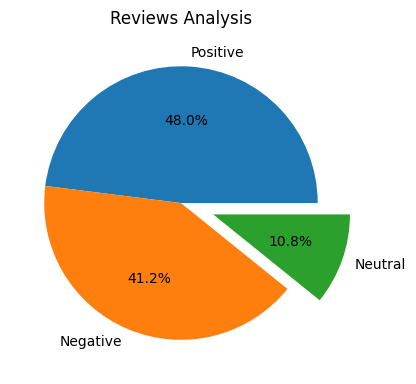

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

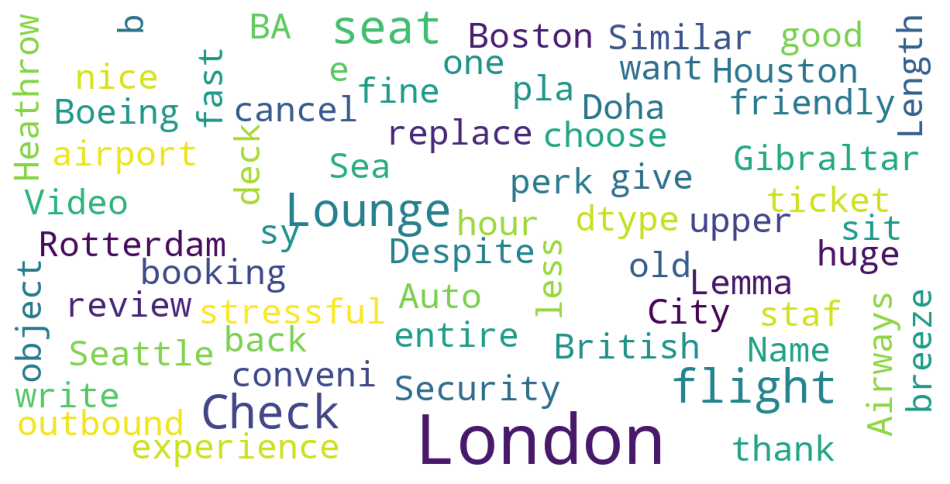

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)